In [1]:
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline

# Array configuration

Text(0,0.5,u'y [m]')

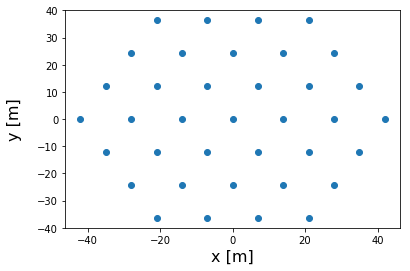

In [2]:
arr_pos_file = '/Users/JBurba/hera_things/brownscripts/jtb/bayes/hera-37_ant_pos.npy'
arr_pos = np.load(arr_pos_file)
scatter(arr_pos[:,0], arr_pos[:,1], marker='o')
xlabel('x [m]', size=16)
ylabel('y [m]', size=16, labelpad=15)

# Generate uvws from array configuration


Frequency range (MHz): 100.0,150.0
Writing uvw_data/uvws_100-150MHz_1.0MHz.npy ...



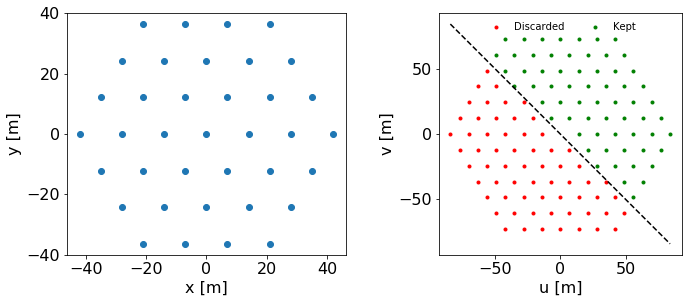

In [3]:
freq_str = '100-150'
freq_res_str = '1.0'
%run uv_from_blns.py --positions=$arr_pos_file --freq=$freq_str --freq_res=$freq_res_str --snapshot --plot --write
uvw_path = '/Users/JBurba/hera_things/brownscripts/jtb/bayes/uvw_data/'
uvw_file = uvw_path + 'uvws_' + freq_str + 'MHz_' + freq_res_str + 'MHz.npy'

# Compare NUDFT with analytical solution for point source

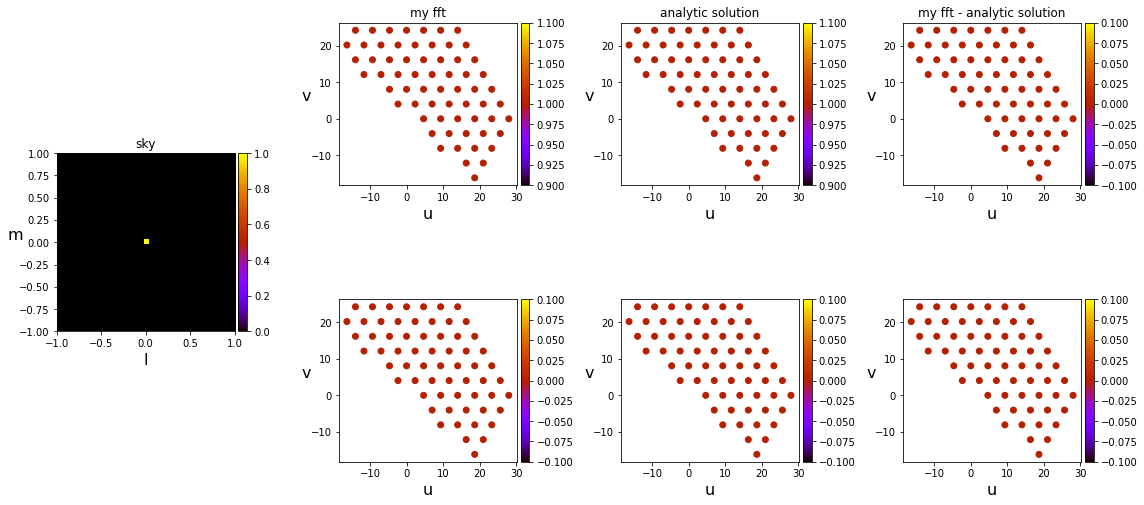

In [4]:
%run nudft.py --uvdata=$uvw_file --plot_phase

# Numeric and analytic solution have no variation in amplitude so there's 
# really no need for the colorbar on the two top, middle plots

### Check that phase changes when point source moved away from zenith

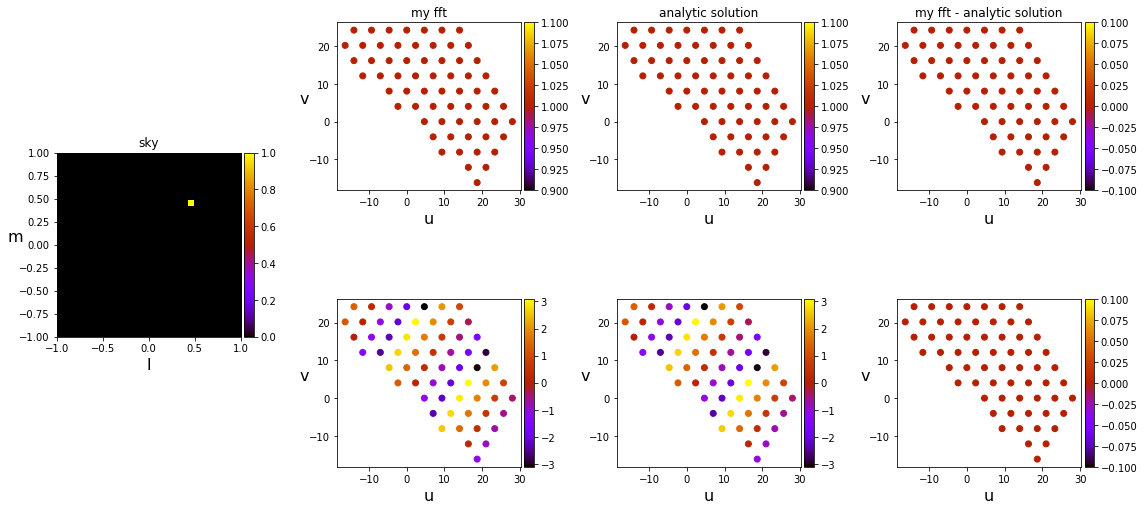

In [5]:
%run nudft.py --uvdata=$uvw_file --plot_phase --l_offset=0.5 --m_offset=0.5

# Plot 2d power spectrum
Averaged over circular annuli $k=\sqrt{u^2+v^2}$ in the uv-plane
$ P(k) = \frac{1}{N_k}\sum_{i=1}^{N_k}\left|V_k(u,v)\right|^2$.  
Compared for various pixel lengths on a side i.e. varying sky resolution.

In [6]:
%run simulate_visibilities.py --uvdata=$uvw_file --freq=$freq_str --freq_res=$freq_res_str --zenith_source --write
vis_path = '/Users/JBurba/hera_things/brownscripts/jtb/bayes/sim_vis/'
vis_file = vis_path + 'visdata_' + freq_str + 'MHz_' + freq_res_str + 'MHz_zenith.npy'

Loading uvdata...
Constructing sky...
Performing DFT via for loop...
DFT completed in 0.1 s
Visibilities array shape: (51, 63)
Writing sim_vis/visdata_100-150MHz_1.0MHz_zenith.npy ...



In [ ]:
%run simulate_visibilities.py --uvdata=$uvw_file --freq=$freq_str --freq_res=$freq_res_str --horizon_source --write
vis_path = '/Users/JBurba/hera_things/brownscripts/jtb/bayes/sim_vis/'
vis_file = vis_path + 'visdata_' + freq_str + 'MHz_' + freq_res_str + 'MHz_horizon.npy'

### Plot simulated visibilities

In [ ]:
%run plot_visibilities_npy.py --visdata=$vis_file

In [ ]:
%run vis_position_compare.py --visdata=$vis_file

### Effect of source position on 2d power spectra
Compare 2d power spectra for point source catalog using exact and nearest pixel centers for source positions

(51, 63)
Not plotting in log scale


invalid value encountered in divide
divide by zero encountered in log10
divide by zero encountered in log10
divide by zero encountered in log10


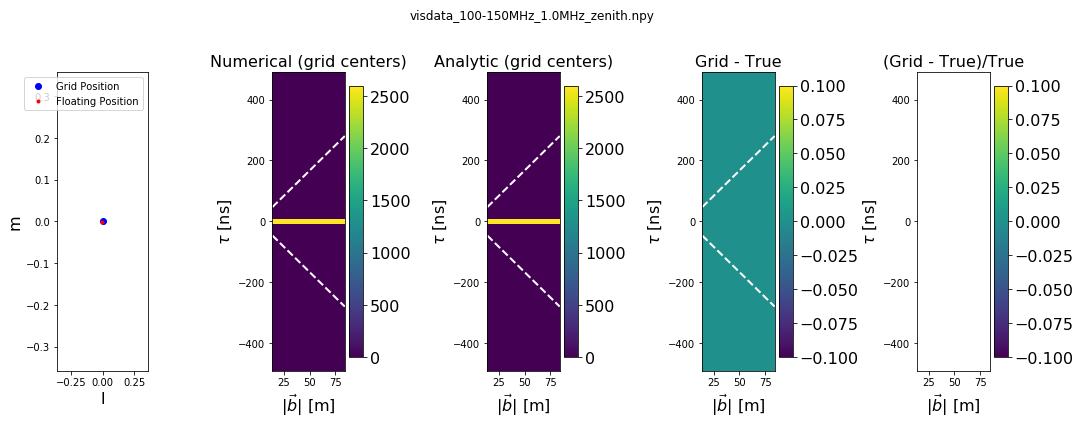

In [7]:
%run delay_pspec_position_compare.py --visdata=$vis_file --grid_pos

(51, 63)
Not plotting in log scale


invalid value encountered in log10
invalid value encountered in log10
invalid value encountered in log10


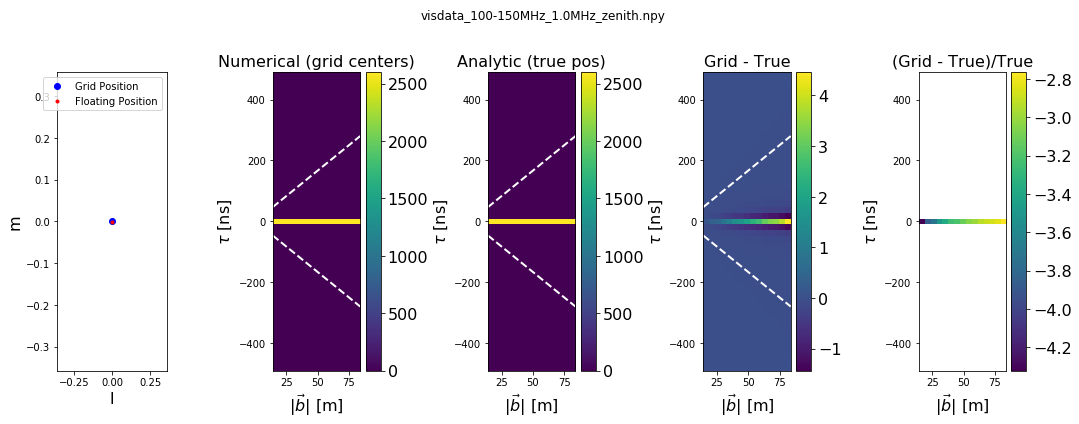

In [8]:
%run delay_pspec_position_compare.py --visdata=$vis_file

-----------

Maximum likelihood given by
$$ \log L = -\frac{1}{2}\left( \mathbf{d} - \mathbf{F}\mathbf{a} \right)^\dagger \mathbf{N}^{-1}\left( \mathbf{d} - \mathbf{F}\mathbf{a}  \right) $$
which has a solution of
$$ \hat{\mathbf{a}} = \left( \mathbf{F}^\dagger\mathbf{N}^{-1}\mathbf{F} \right)^{-1}\mathbf{F}^\dagger\mathbf{N}^{-1}\mathbf{d} $$
where $\mathbf{d}=\mathbf{s} + \mathbf{n}$ is the data made of a signal $\mathbf{s}$ and noise $\mathbf{n}$ which can be generated from a set with an RMS of $\sim10^{-5}$, we'll say.  This small RMS produces a small width in the peak of $\log L$.  $\mathbf{F}$ is the FT going from l,m to u,v space.  $\mathbf{N}$ is the covariance matrix of the noise.  $\mathbf{a}$ is a set of pixel amplitudes.

---

In [ ]:
DFT.shape